In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-classification-dataset/Heart Attack.csv


# load data

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-classification-dataset/Heart Attack.csv")

In [3]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
df.shape

(1319, 9)

In [5]:
df.size

11871

In [6]:
df.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().any()

age              False
gender           False
impluse          False
pressurehight    False
pressurelow      False
glucose          False
kcm              False
troponin         False
class            False
dtype: bool

# Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [10]:
df.describe().round(2)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.00,1319.00,1319.00,1319.00,1319.00,1319.00,1319.00,1319.00
mean,56.19,0.66,78.34,127.17,72.27,146.63,15.27,0.36
std,13.65,0.47,51.63,26.12,14.03,74.92,46.33,1.15
min,14.00,0.00,20.00,42.00,38.00,35.00,0.32,0.00
25%,47.00,0.00,64.00,110.00,62.00,98.00,1.65,0.01
50%,58.00,1.00,74.00,124.00,72.00,116.00,2.85,0.01
75%,65.00,1.00,85.00,143.00,81.00,169.50,5.80,0.09
max,103.00,1.00,1111.00,223.00,154.00,541.00,300.00,10.30


In [11]:
df.nunique()

age               75
gender             2
impluse           79
pressurehight    116
pressurelow       73
glucose          244
kcm              700
troponin         352
class              2
dtype: int64

In [12]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:",numerical_columns)

object_columns = df.select_dtypes(include=['object']).columns
print("\nObject Columns:",object_columns)

Numerical Columns: Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin'],
      dtype='object')

Object Columns: Index(['class'], dtype='object')


In [13]:
for column in numerical_columns:
    unique_value = df[column].unique()
    print(f"{column}:{unique_value}")

age:[ 64  21  55  58  32  63  44  67  54  47  61  86  45  37  60  48  52  30
  50  72  42  35  68  56  65  34  40  46  38  57  28  49  29  80  90  62
  53  75  66  19  77  71  43  51  59  20  36  70  78  69  73  41  82  25
  26  76  33  39  91  31  74  22  79  81  27  83  24  85  88 100  23  14
  87 103  84]
gender:[1 0]
impluse:[  66   94   64   70   61   40   60   76   81   73   72   92  135   63
   65  125   62   58   93   96   95   97   91   87   77   80   82   83
   78   90   59   57   98 1111  102  103  105   74   85   75   71   68
   67   56   89   88   86   79  100   69   84  110  120  122  119  116
  114   55   53   54  117  112  108  134  111  101  113   51   52   99
  132   50  107  104   49   46   20   36   45]
pressurehight:[160  98 120 112 179 214 154 166 150 199 122 118 114 100 107 109 151 110
 104 106 152 134 135 131 137 121 145 136 156 155 105  91 101 111 115 133
 153 125 130 127 140 141 128 123  94  95 117 124 119 138 157 202 175 144
 129  97 116 113 148 164 192 171 1

In [14]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

class: ['negative' 'positive']


In [15]:
for column in numerical_columns:
    value_counts = df[column].value_counts()
    print(column,':') 
    print(value_counts)
    print('\n')

age :
60     106
70      73
50      68
63      64
65      62
      ... 
88       1
100      1
14       1
91       1
84       1
Name: age, Length: 75, dtype: int64


gender :
1    870
0    449
Name: gender, dtype: int64


impluse :
60     95
61     57
70     48
64     47
82     46
       ..
49      1
46      1
110     1
36      1
45      1
Name: impluse, Length: 79, dtype: int64


pressurehight :
150    50
130    41
125    41
120    38
140    32
       ..
204     1
78      1
71      1
70      1
89      1
Name: pressurehight, Length: 116, dtype: int64


pressurelow :
75     69
68     67
80     57
70     44
60     43
       ..
102     1
106     1
38      1
47      1
154     1
Name: pressurelow, Length: 73, dtype: int64


glucose :
100.0    41
87.0     32
98.0     31
96.0     30
94.0     30
         ..
338.0     1
282.0     1
354.0     1
153.0     1
331.0     1
Name: glucose, Length: 244, dtype: int64


kcm :
300.000    19
1.600      11
2.110       9
1.330       9
1.830       9
           

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Bar(x=df[i].value_counts().index, y=df[i].value_counts(),uid =None)])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Count")
    fig.show()

In [18]:
for i in object_columns:
    fig = go.Figure(data=[go.Bar(x=df[i].value_counts().index, y=df[i].value_counts())])
    fig.update_layout(
        title= i,
        xaxis_title= i,
        yaxis_title="Count"
    )
    fig.show()

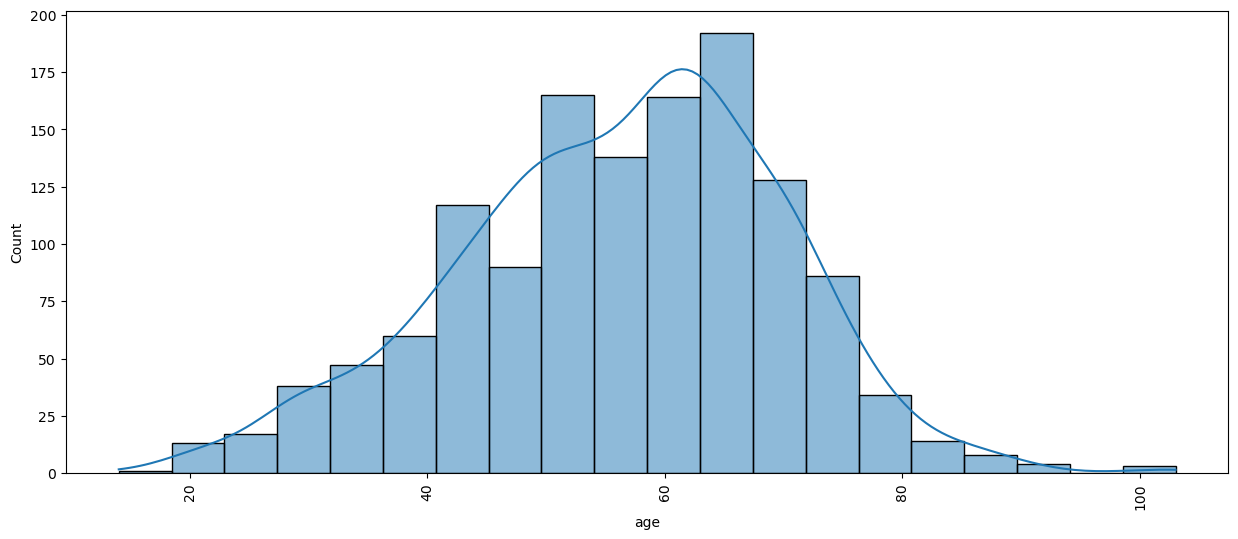

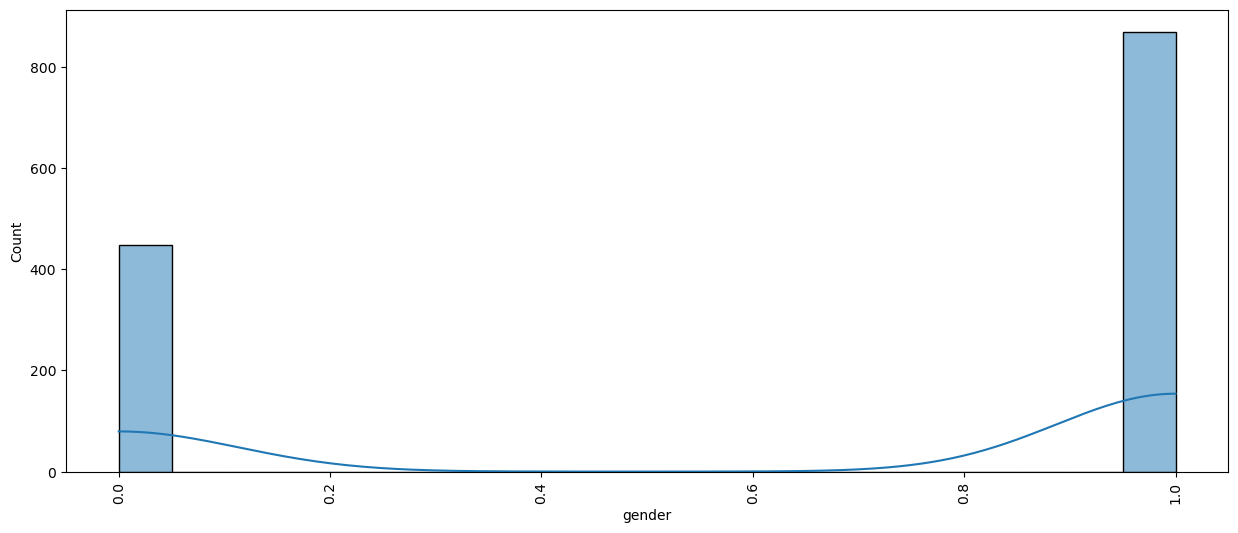

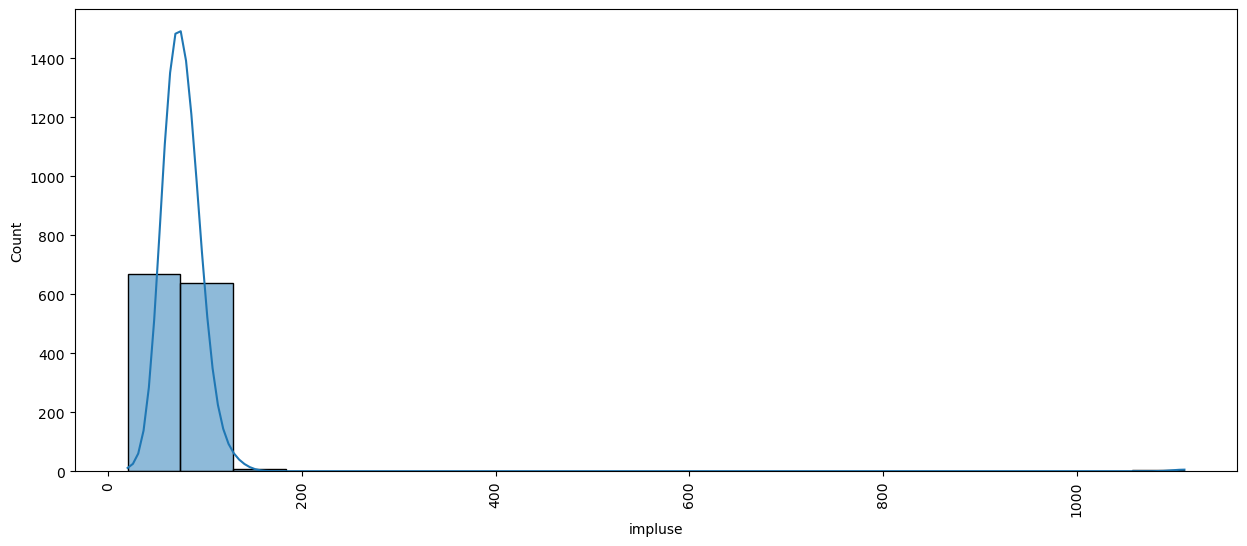

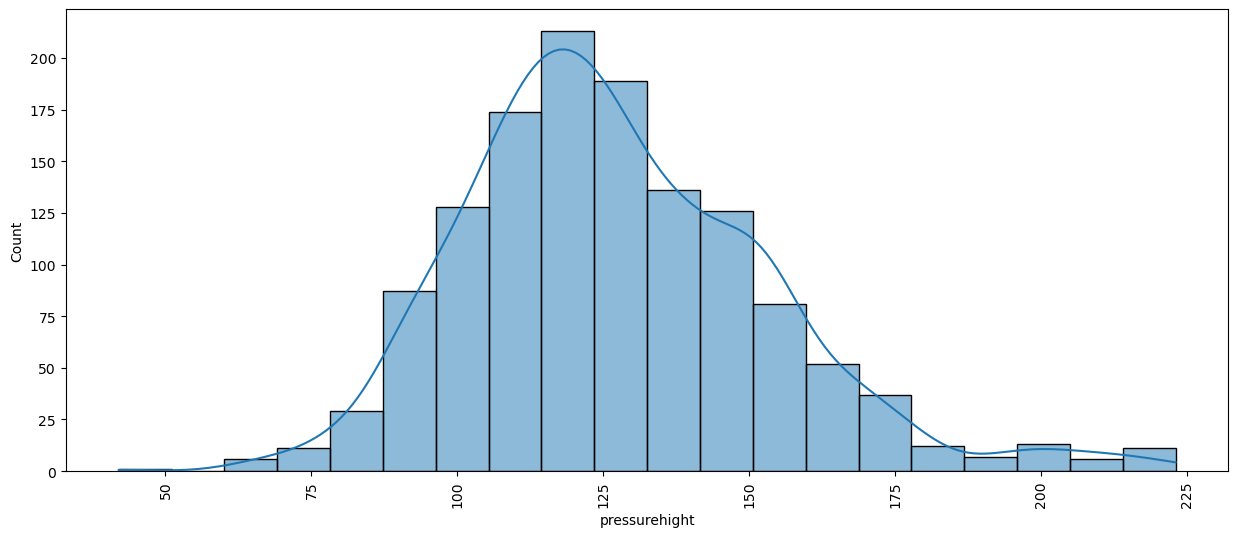

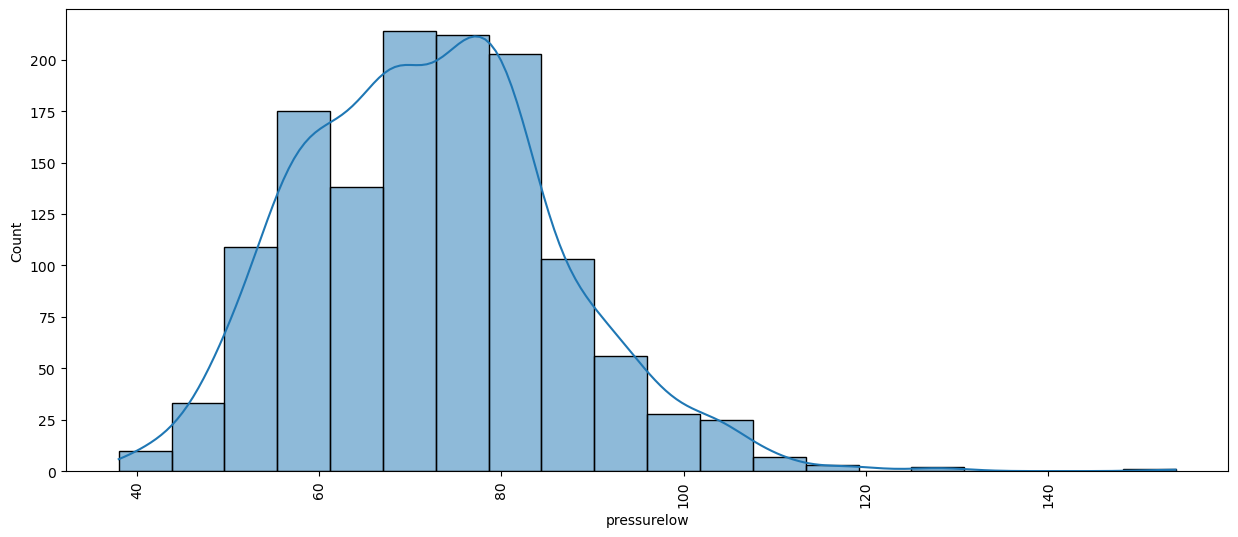

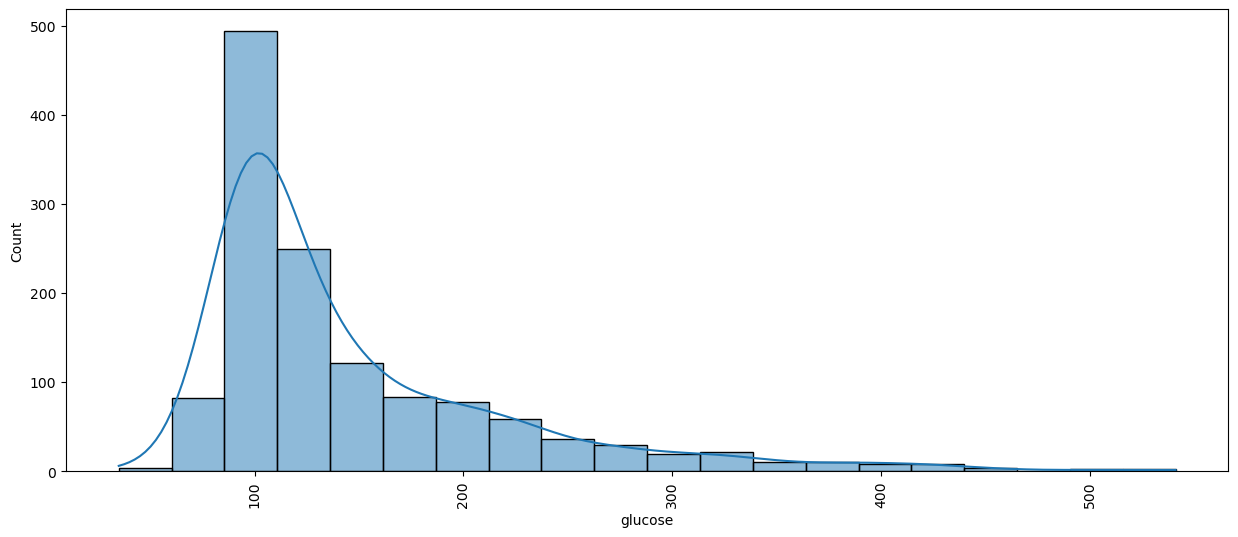

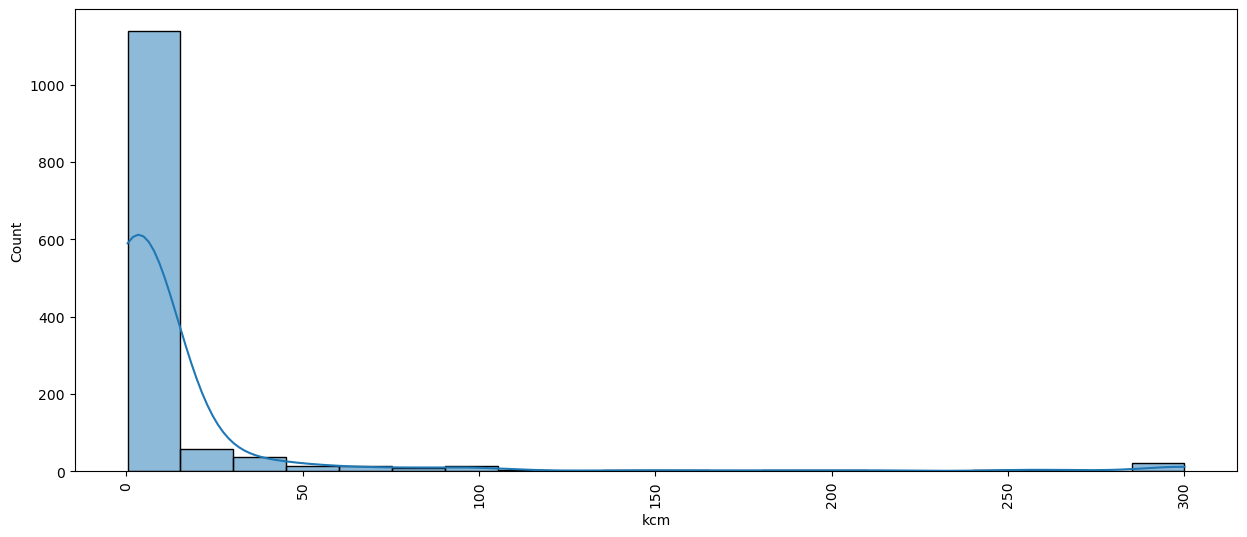

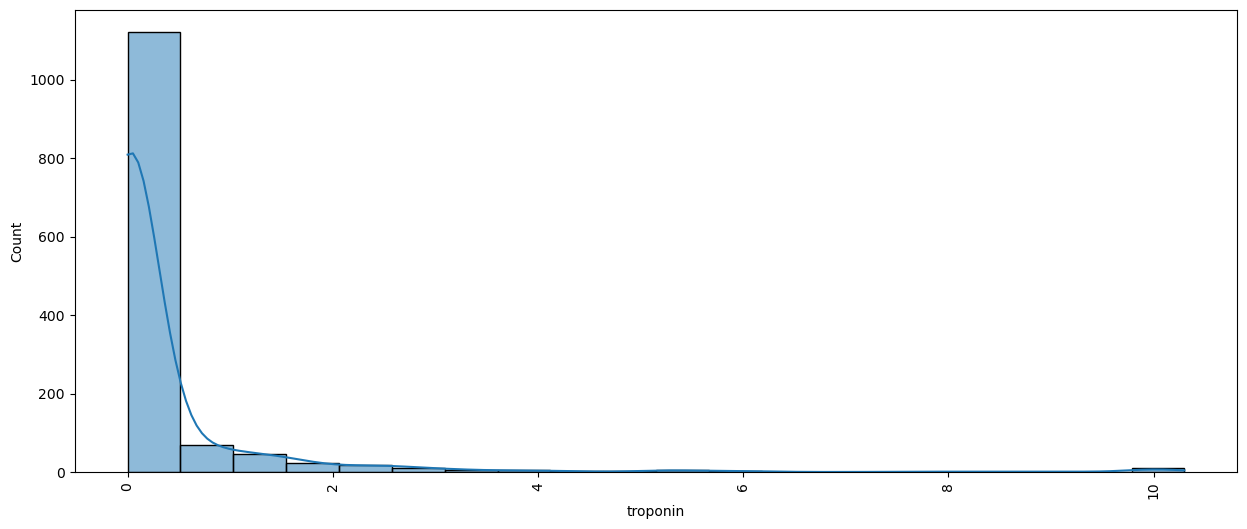

In [19]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

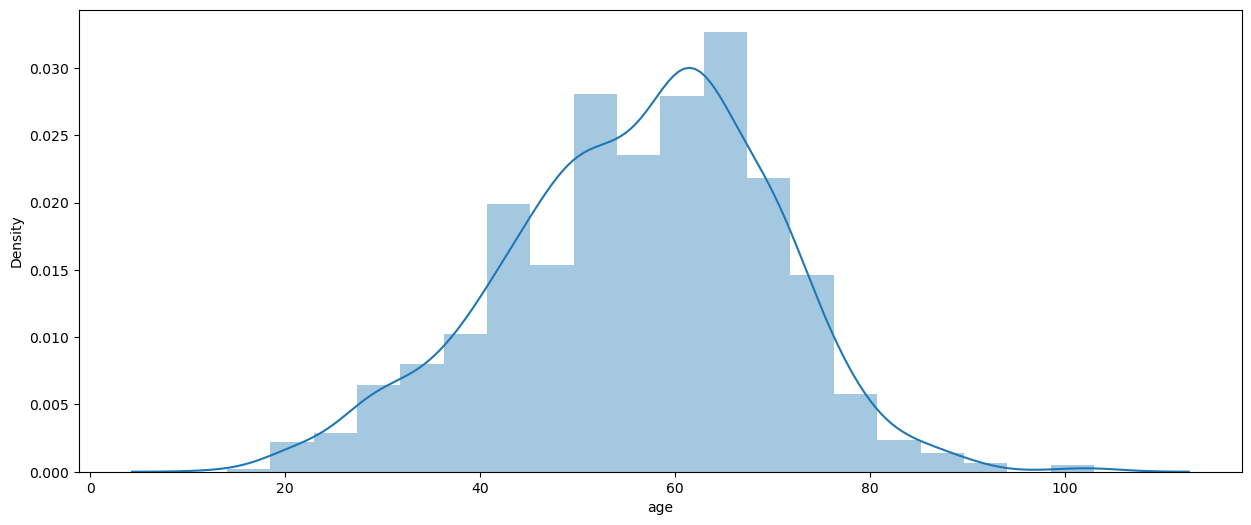

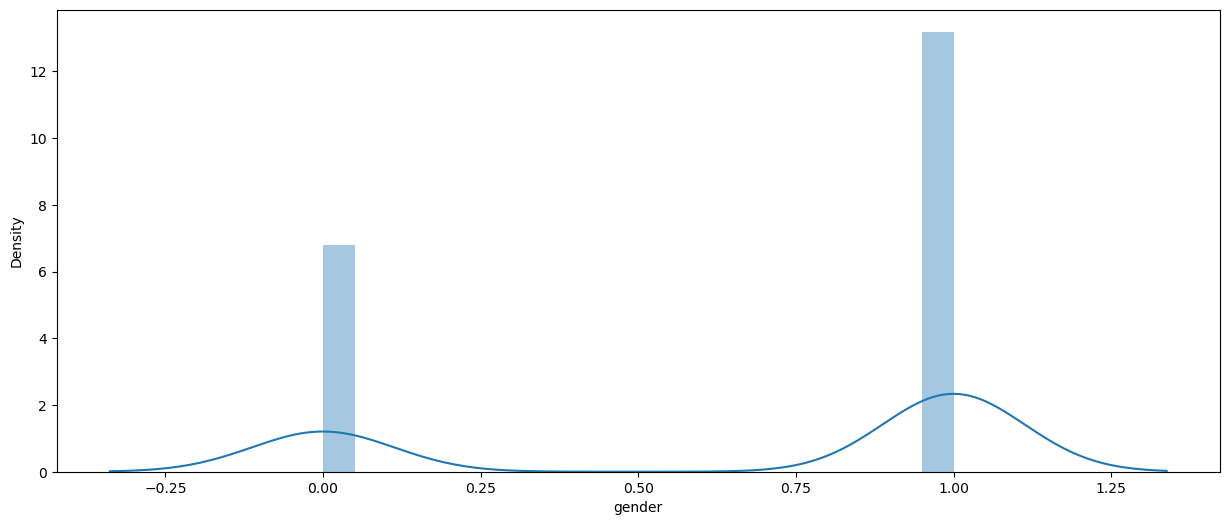

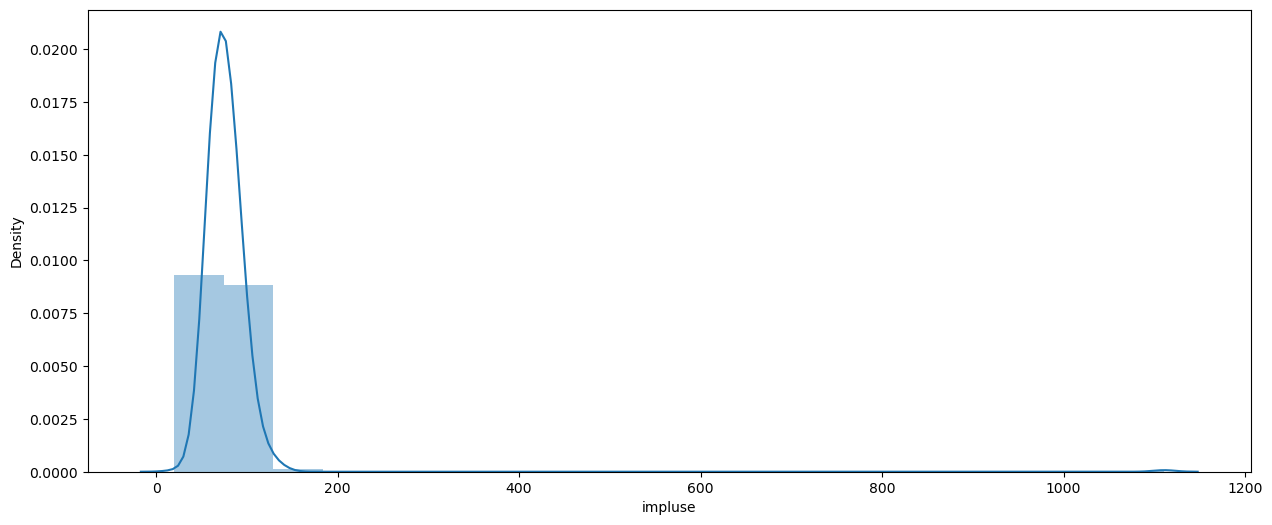

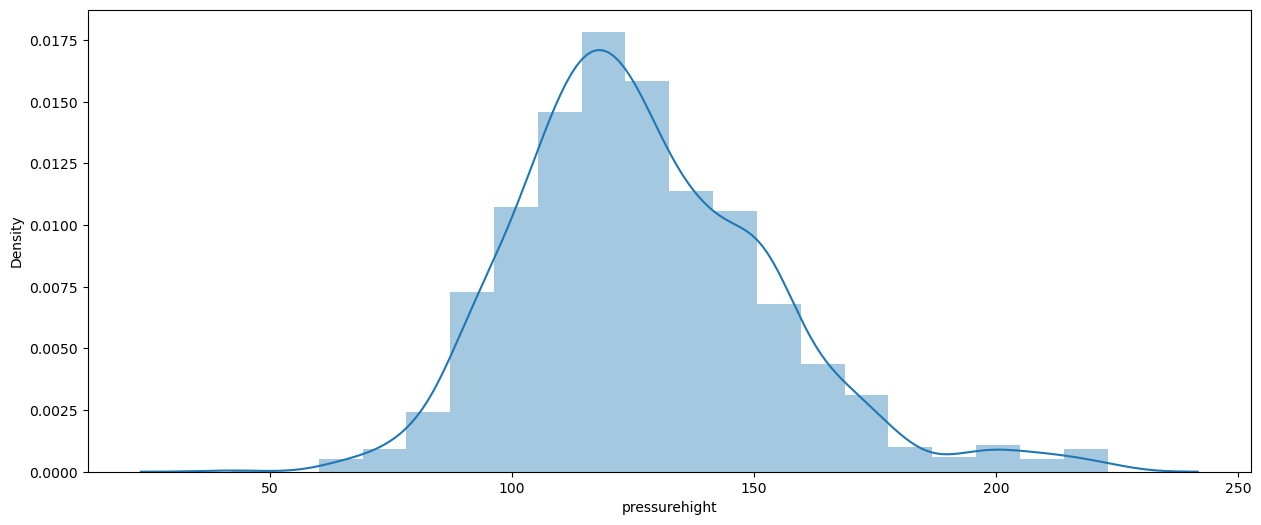

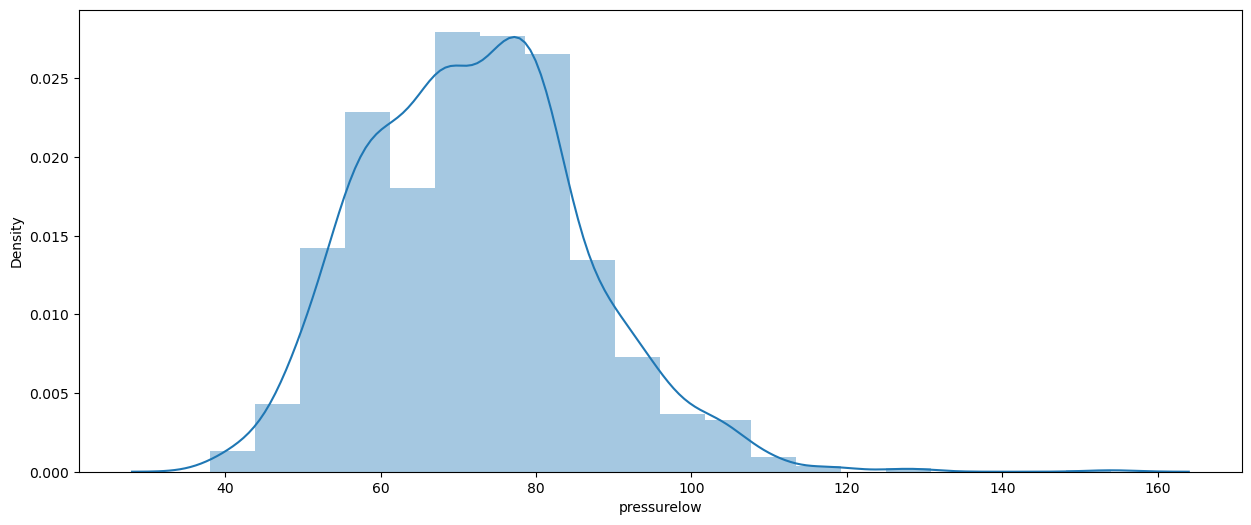

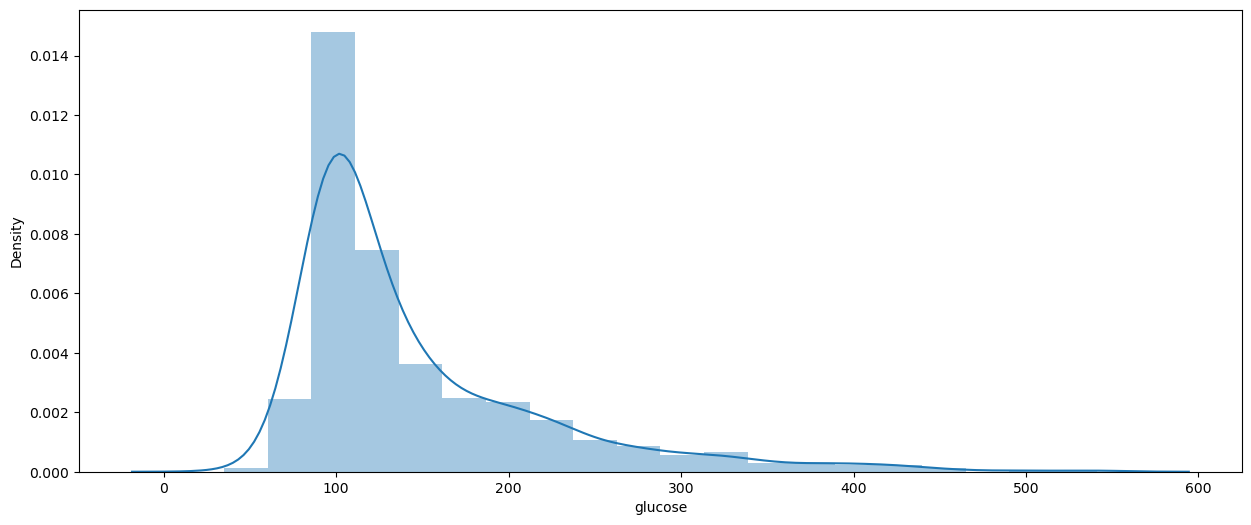

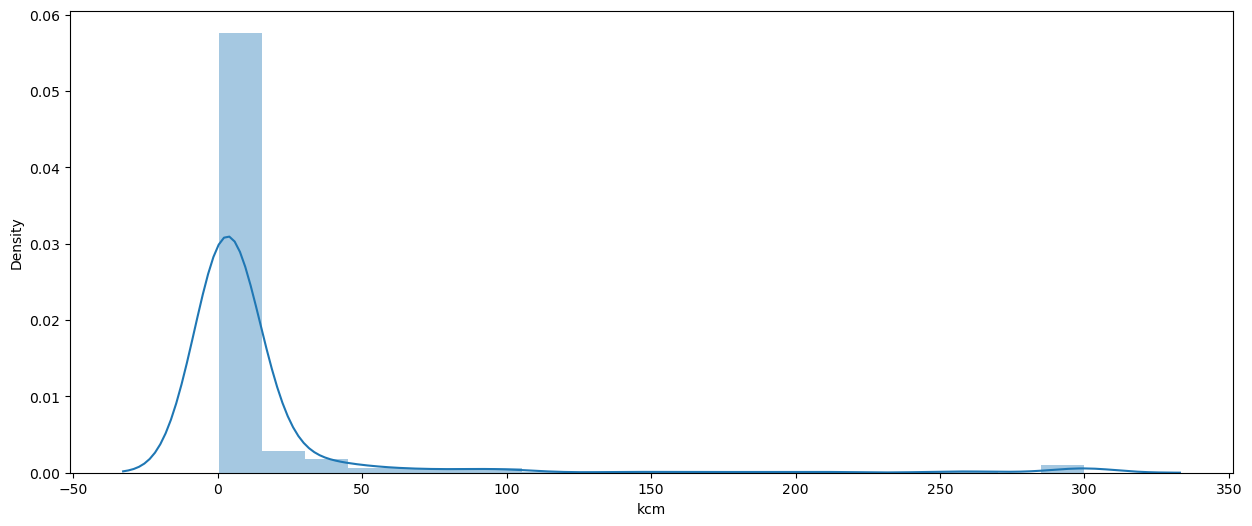

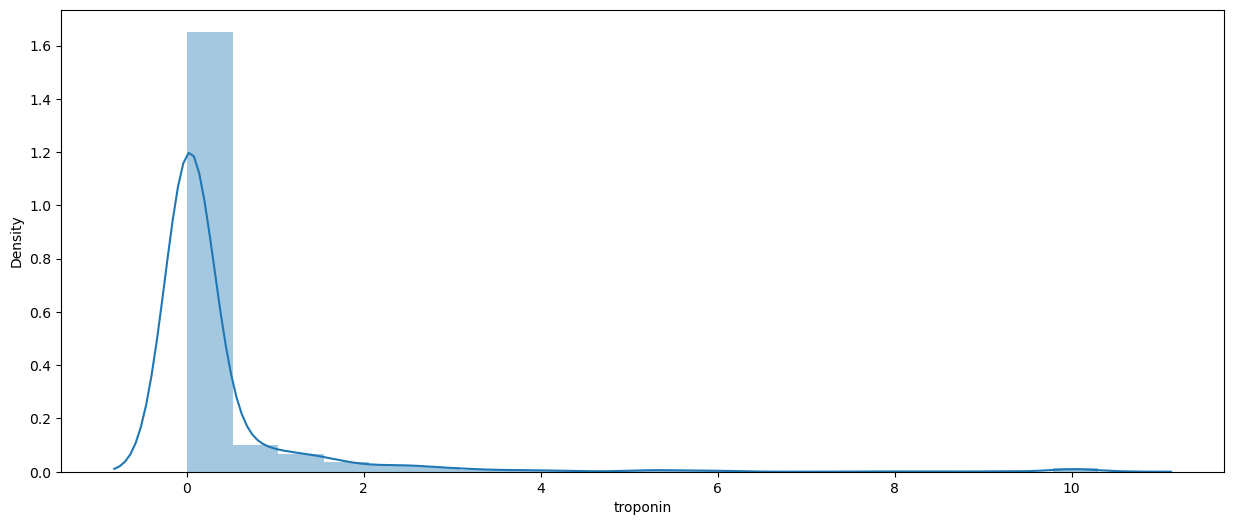

In [20]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

In [21]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Histogram(x=df[i], nbinsx=20)])
    fig.update_layout(
        title=f'Histogram of {i}',
        xaxis_title=i,
        yaxis_title="Count"
    )
    fig.update_traces(marker=dict(line=dict(width=1, color='black')))
    fig.show()

In [22]:
fig = px.bar(
    df,
    x='class',
    y='impluse',
    title='Average impluse by age',
    color='age',
    barmode='group'
)
fig.show()

In [23]:
fig = px.bar(
    df,
    x='class',
    y='pressurehight',
    title='Average pressurehight by age',
    color='age',
    barmode='group'
)
fig.show()

In [24]:
fig = px.bar(
    df,
    x='age',
    y='pressurelow',
    title='Average pressurelow by age',
    color='class',
    barmode='group'
)
fig.show()

In [25]:
fig = px.bar(
    df,
    x='age',
    y='glucose',
    title='Average glucose by class',
    color='class',
    barmode='group'
)
fig.show()

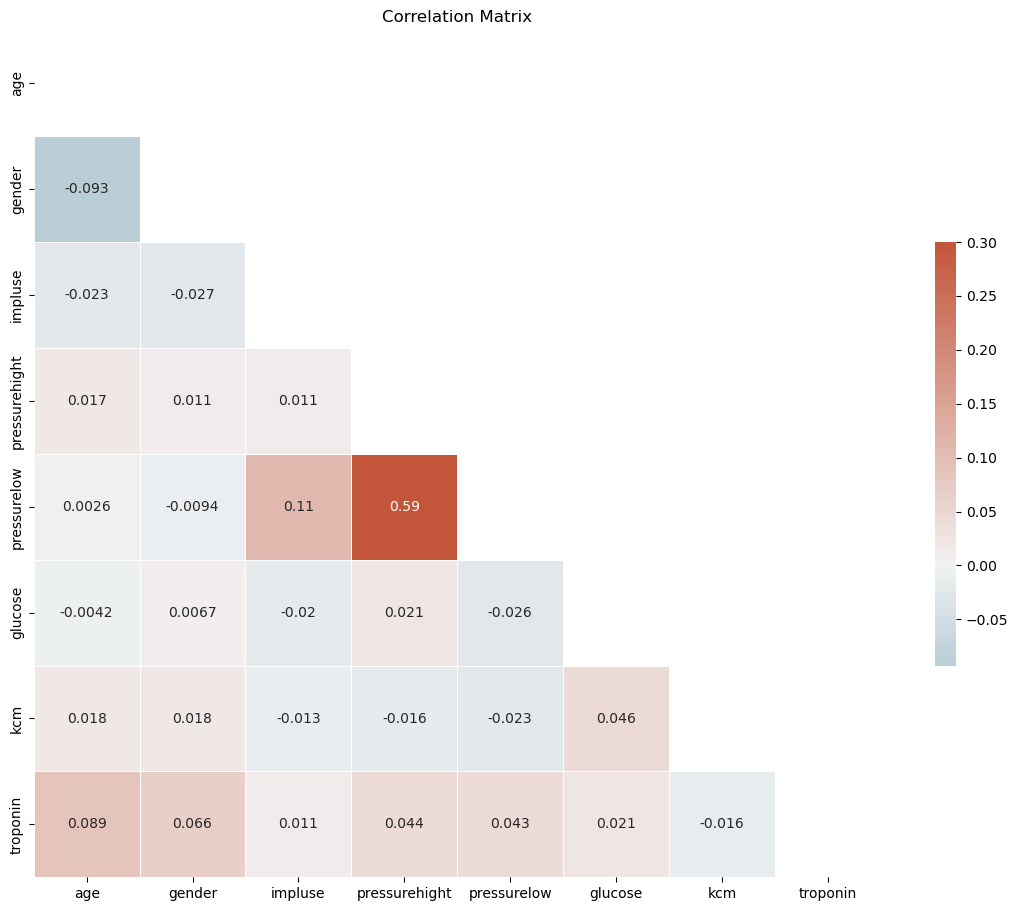

In [26]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(14, 11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Classification 

In [27]:
# Map the class column to binary
df['class'] = df['class'].map({'negative': 0, 'positive': 1})

# Split the dataset into features (X) and target variable (y)
X = df.drop('class', axis=1)
y = df['class']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler
X_test_scaled = scaler.transform(X_test)

In [31]:
# Create the logistic regression model
model = LogisticRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [32]:

y_pred = model.predict(X_test_scaled)


In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

# Print the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7992424242424242
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       101
           1       0.82      0.87      0.84       163

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.78       264
weighted avg       0.80      0.80      0.80       264

Confusion Matrix:
[[ 70  31]
 [ 22 141]]


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [36]:
y_pred = rf.predict(X_test_scaled)


In [37]:
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf*100)

print(classification_report(y_test, y_pred))

Accuracy: 98.10606060606061
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       101
           1       0.99      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



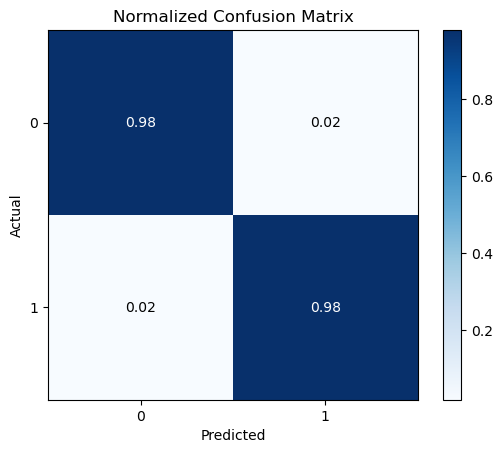

In [38]:
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [41]:
y_pred = dt.predict(X_test_scaled)

In [42]:
accuracy_dt = accuracy_score(y_test,y_pred)

In [43]:
print("Accuracy:", accuracy_rf*100)

print(classification_report(y_test, y_pred))

Accuracy: 98.10606060606061
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       101
           1       0.98      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



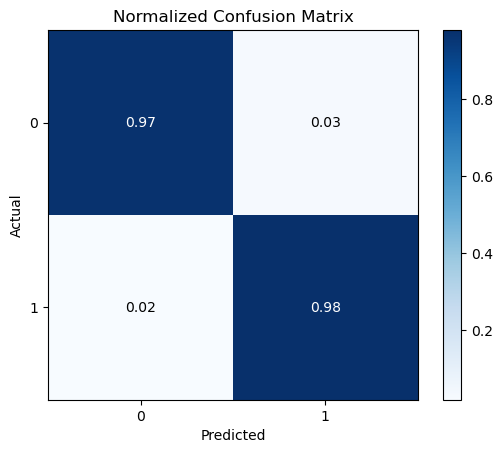

In [44]:
cm = confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [45]:
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [accuracy, accuracy_rf, accuracy_dt]
data = {'Model': model_names, 'Accuracy': accuracies}
df_accuracy = pd.DataFrame(data)
fig = px.bar(df_accuracy, x='Model', y='Accuracy', color='Model', title='Model Accuracy Comparison')
fig.show()